<a href="https://colab.research.google.com/github/lalalalalala-hi/AI-and-Machine-Learning/blob/main/Breast_Cancer_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Tools
* pandas - data analysis
* numpy - numerical operations
* sklearn(Scikit-Learn) - machine learning modelling and evaluation
* keras - traning neutral network model
* matplotib and Seaborn - data visualization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Load Data

In [ ]:
# Load the dataset
data = pd.read_csv('/content/breast-cancer.data.csv')

In [ ]:
data.head()

,class,age,menopause,Tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# Encode Categorical variable

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data.head()

,class,age,menopause,Tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


# Modelling

In [ ]:
# Split into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Normalization


*   fit_transform() - compute the mean and standard deviation of each feature and transforms the data based on the statistics



In [ ]:
# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# K-fold Cross Validation

In [ ]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Initialize lists to store metrics
accuracies = []
conf_matrices = []

# Perform K-fold Cross Validation
* split the dataset into training and testing sets
* build neural network model
* train and evaluate the testing data
* calculate the accuracy and confusion matrix for each fold



In [ ]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    # Predict probabilities
    y_pred_prob = model.predict(X_test)
    # Convert probabilities to class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

2/2 [==============================] - 0s 5ms/step


# Calculate Mean Accuracy

In [ ]:
# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7415003061294556


# Calculate Confusion Matrix

In [ ]:
# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrices, axis=0)
print("Mean Confusion Matrix:")
print(mean_conf_matrix)

Mean Confusion Matrix:
[[35.6  4.6]
 [10.2  6.8]]


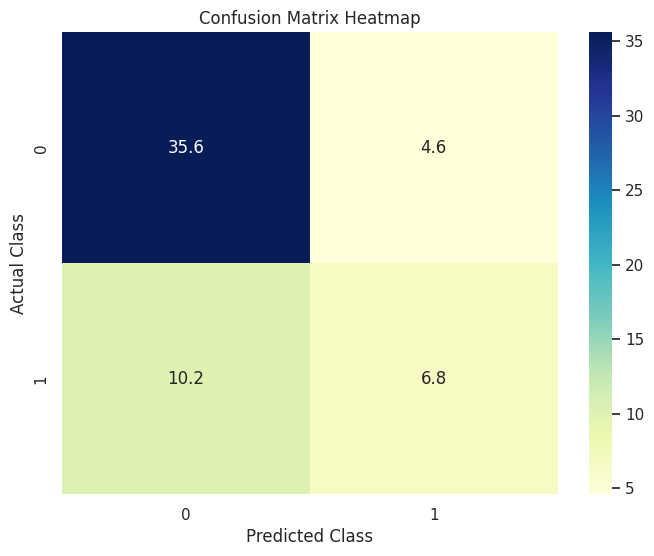

In [ ]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix Heatmap')
plt.show()